In [ ]:
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
fashion_mnint = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnint.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

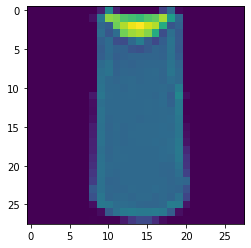

In [ ]:
# 시각화 

plt.imshow(train_images[2])

In [ ]:
# 데이터 변환 - 최소최대정규화 
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
# 데이터 변환 : 3차원 -> 2차원 
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [ ]:
# 데이터 변환 - one-hot encoding 
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
# 모델 구성 

model = keras.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, one_hot_train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6580 - accuracy: 0.7732 - val_loss: 0.4434 - val_accuracy: 0.8429
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3911 - accuracy: 0.8588 - val_loss: 0.4124 - val_accuracy: 0.8535
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3574 - accuracy: 0.8703 - val_loss: 0.3604 - val_accuracy: 0.8688
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3179 - accuracy: 0.8853 - val_loss: 0.3484 - val_accuracy: 0.8730
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3048 - accuracy: 0.8865 - val_loss: 0.3370 - val_accuracy: 0.8792


In [ ]:
model.evaluate(test_images, one_hot_test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8706


[0.36477452516555786, 0.8705999851226807]

In [ ]:
### 다른 방법 구현

In [ ]:
fashion_mnint = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnint.load_data()

In [ ]:
# model = keras.Sequential()
# model.add(keras.layers.Flatten(input_shape=(28,28)))   #reshape 안해도 됨 
# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(10, activation='softmax')                    
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 10.9524 - accuracy: 0.6798
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6622 - accuracy: 0.7658
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5723 - accuracy: 0.7954
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5228 - accuracy: 0.8176
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5136 - accuracy: 0.8226


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.8150


[0.5588457584381104, 0.8149999976158142]

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4358 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1270 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0815 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0572 - accuracy: 0.9830
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9769


[0.07620100677013397, 0.9768999814987183]

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4879 - accuracy: 0.8562
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1467 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1075 - accuracy: 0.9689
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0858 - accuracy: 0.9741
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9773


[0.07259901612997055, 0.9772999882698059]